## <b><font color='darkblue'>Preface</font></b>
([article source](https://machinelearningmastery.com/what-is-bayesian-optimization/)) <b><font size='3ptx'>In this tutorial, you will discover how to implement the <font color='darkblue'>Bayesian Optimization algorithm</font> for complex optimization problems</font> Global optimization is a challenging problem of finding an input that results in the minimum or maximum cost of a given objective function.</b>.

Typically, <b>the form of the objective function is complex and intractable to analyze and is often non-convex</b>, nonlinear, high dimension, noisy, and computationally expensive to evaluate.

<b>Bayesian Optimization provides a principled technique based on [**Bayes Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) to direct a search of a global optimization problem that is efficient and effective</b>. It works by building a probabilistic model of the <font color='darkblue'><b>objective function</b></font>, called the <font color='darkblue'><b>surrogate function</b></font>, that is then searched efficiently with an <font color='darkblue'><b>acquisition function</font></b> before candidate samples are chosen for evaluation on the real objective function.

<b>Bayesian Optimization is often used in applied machine learning to tune the hyperparameters of a given well-performing model on a validation dataset.</b>

### <b><font color='darkgreen'>Goal</font></b>
After completing this tutorial, you will know:
* Global optimization is a challenging problem that involves black box and often non-convex, non-linear, noisy, and computationally expensive objective functions.
* Bayesian Optimization provides a probabilistically principled method for global optimization.
* How to implement Bayesian Optimization from scratch and how to use open-source implementations.s.

### <b><font color='darkgreen'>Tutorial Overview</font></b>
This tutorial is divided into four parts; they are:
* <b><a href='#sect1'>Challenge of Function Optimization</a></b>
* <b><a href='#sect2'>What Is Bayesian Optimization</a></b>
* <b><a href='#sect3'>How to Perform Bayesian Optimization</a></b>
* Hyperparameter Tuning With Bayesian Optimizationation
n
tion


## <a id='sect1'><b><font color='darkblue'>Challenge of Function Optimization</font></b></a>
<b><font size='3ptx'><a href='https://en.wikipedia.org/wiki/Global_optimization'>Global function optimization</a>, or function optimization for short, involves finding the minimum or maximum of an objective function.</font> Samples are drawn from the domain and evaluated by the objective function to give a score or cost.</font></b>

Let’s define some common terms:
* **Samples**. One example from the domain, represented as a vector.
* **Search Space**: Extent of the domain from which samples can be drawn.
* **Objective Function**. Function that takes a sample and returns a cost.
* **Cost**. Numeric score for a sample calculated via the <font color='darkblue'><b>objective function</b></font>.

<b>Samples are comprised of one or more variables generally easy to devise or create. One sample is often defined as a vector of variables with a predefined range in an n-dimensional space</b>. This space must be sampled and explored in order to find the specific combination of variable values that result in the best cost.

<b>The cost often has units that are specific to a given domain. Optimization is often described in terms of minimizing cost, as a maximization problem can easily be transformed into a minimization problem by inverting the calculated cost</b>. Together, the minimum and maximum of a function are referred to as the extreme of the function.l extrema).l extrema)./font>.on.

<b>The objective function is often easy to specify but can be computationally challenging to calculate or result in a noisy calculation of cost over time</b>. The form of the objective function is unknown and is often highly nonlinear, and highly multi-dimensional defined by the number of input variables. The function is also probably non-convex. This means that local extrema may or may not be the global extrema (<font color='brown'>e.g. could be misleading and result in premature convergence</font>), hence the name of the task as global rather than local optimization.

<b>Although little is known about the objective function,</b> (<font color='brown'>it is known whether the minimum or the maximum cost from the function is sought</font>), <b>and as such, it is often referred to as a black box function and the search process as black box optimization</b>. Further, the objective function is sometimes called an oracle given the ability to only give answers.

<b>Function optimization is a fundamental part of machine learning. Most machine learning algorithms involve the optimization of parameters</b> (<font color='brown'>weights, coefficients, etc.</font>) <b>in response to training data</b>. <b>Optimization also refers to the process of finding the best set of hyperparameters that configure the training of a machine learning algorithm</b>. Taking one step higher again, the selection of training data, data preparation, and machine learning algorithms themselves is also a problem of function optimization.

Summary of optimization in machine learning:
* <b>Algorithm Training</b>. Optimization of model parameters.
* <b>Algorithm Tuning</b>. Optimization of model hyperparameters.
* <b>Predictive Modeling</b>. Optimization of data, data preparation, and algorithm selection.

Many methods exist for function optimization, such as randomly sampling the variable search space, called random search, or systematically evaluating samples in a grid across the search space, called grid search.

<b>More principled methods are able to learn from sampling the space so that future samples are directed toward the parts of the search space that are most likely to contain the extrema.</b>

<b>A directed approach to global optimization that uses probability i<font color='darkblue'>s called Bayesian Opt</font>imiz.tion</b>.ma</b>.on.n.

## <a id='sect2'><b><font color='darkblue'>What Is Bayesian Optimization</font></b></a>
<b><font size='3ptx'>Bayesian Optimization is an approach that uses Bayes Theorem to direct the search in order to find the minimum or maximum of an objective function.</font></b>

It is an approach that is most useful for objective functions that are complex, noisy, and/or expensive to evaluate:
> Bayesian optimization is a powerful strategy for finding the extrema of objective functions that are expensive to evaluate. […] It is particularly useful when these evaluations are costly, when one does not have access to derivatives, or when the problem at hand is non-convex.
> <br/><br/>
> [— A Tutorial on Bayesian Optimization of Expensive Cost Functions, with Application to Active User Modeling and Hierarchical Reinforcement Learning, 2010.](https://arxiv.org/abs/1012.2599)

Recall that [**Bayes Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is an approach for calculating the conditional probability of an event:
> $P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$

<br/>

We can simplify this calculation by removing the normalizing value of $P(B)$ and describe the conditional probability as a proportional quantity. This is useful as we are not interested in calculating a specific conditional probability, but instead in optimizing a quantity.
> $P(A|B) = P(B|A) * P(A)$

<br/>

The conditional probability that we are calculating is referred to generally as the <b><font color='darkblue'>posterior probability</font></b>; the reverse conditional probability is sometimes referred to as the <b><font color='orange'>likelihood</font></b>, and the marginal probability is referred to as the <b><font color='violet'>prior probability</font></b>; for example:
> <b><font color='darkblue'>posterior</font></b> = <b><font color='orange'>likelihood</font> * <font color='violet'>prior</font></b>

<br/>

<b>This provides a framework that can be used to quantify the beliefs about an unknown objective function given samples from the domain and their evaluation via the objective function</b>.

<b>We can devise specific samples $(x1, x2, …, xn)$ and evaluate them using the objective function $f(xi)$ that returns the cost or outcome for the sample $xi$</b>. Samples and their outcome are collected sequentially and define our data $D$, e.g. $D = \{xi, f(xi), … xn, f(xn)\}$ and is used to define the <b><font color='violet'>prior</font></b>. The <b><font color='orange'>likelihood function</font></b> is defined as the probability of observing the data given the function $P(D | f)$. <b>This <b><font color='orange'>likelihood function</font></b> will change as more observations are collected</b>.
> $P(f|D) = P(D|f) * P(f)$

<br/>

<b>The <font color='darkblue'>posterior</font> represents everything we know about the objective function. It is an approximation of the objective function and can be used to estimate the cost of different candidate samples that we may want to evaluate</b>.

In this way, <b>the <font color='darkblue'>posterior probability</font> is a surrogate objective function</b>.
> The posterior captures the updated beliefs about the unknown objective function. One may also interpret this step of Bayesian optimization as estimating the objective function with a surrogate function (also called a response surface).
> <br/><br/>
> [— A Tutorial on Bayesian Optimization of Expensive Cost Functions, with Application to Active User Modeling and Hierarchical Reinforcement Learning, 2010.](https://arxiv.org/abs/1012.2599)

* <b><font color='darkblue'>Surrogate Function</font></b>: Bayesian approximation of the objective function that can be sampled efficiently.

The <b><font color='darkblue'>surrogate function</font></b> gives us an estimate of the objective function, which can be used to direct future sampling. <b>Sampling involves careful use of the <font color='darkblue'>posterior</font> in a function known as the “acquisition” function, e.g. for acquiring more samples</b>. We want to use our belief about the objective function to sample the area of the search space that is most likely to pay off, therefore <b>the acquisition will optimize the conditional probability of locations in the search to generate the next sample</b>.
* <b><font color='darkblue'>Acquisition Function</font></b>: Technique by which the <b><font color='darkblue'>posterior</font></b> is used to select the next sample from the search space.

<br/>

Once additional samples and their evaluation via the objective function $f(...)$ have been collected, they are added to data $D$ and <b><font color='darkblue'>the posterior</font></b> is then updated. <b>This process is repeated until the extrema of the objective function is located, a good enough result is located, or resources are exhausted.</b>

The Bayesian Optimization algorithm can be summarized as follows:
1. Select a Sample by Optimizing the Acquisition Function.
2. Evaluate the Sample With the Objective Function.
3. Update the Data and, in turn, the Surrogate Function.
4. Go To 1.

## <a id='sect3'><b><font color='darkblue'>How to Perform Bayesian Optimization</font></b></a>
<b><font size='3ptx'>In this section, we will explore how Bayesian Optimization works by developing an implementation from scratch for a simple one-dimensional test function.</font></b>
* <a href='#sect3_1'><b><font size='3ptx'>Test Problem</font></b></a>
* <a href='#sect3_2'><b><font size='3ptx'>Surrogate Function</font></b></a>
* <a href='#sect3_3'><b><font size='3ptx'>Acquisition Function</font></b></a>
* <a href='#sect3_4'><b><font size='3ptx'>Complete Bayesian Optimization Algorithm</font></b></a>
* <a href='#sect3_5'><b><font size='3ptx'>Hyperparameter Tuning With Bayesian Optimization</font></b></a>

First, we will define the test problem, then how to model the mapping of inputs to outputs with a surrogate function. Next, we will see how the surrogate function can be searched efficiently with an acquisition function before tying all of these elements together into the Bayesian Optimization procedure.

In [100]:
from math import sin
from math import pi
from matplotlib import pyplot as plt
import numpy as np
from numpy import arange
from numpy import argmax
from numpy import asarray
from numpy import vstack
from numpy.random import normal
from numpy.random import random

from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter

### <a id='sect3_1'><b><font color='darkgreen'>Test Problem</font></b></a>
<b><font size='3ptx'>The first step is to define a test problem.</font></b>

We will use a multimodal problem with five peaks, calculated as:
> $y = x^2 * sin(5 * PI * x)^6$

<br/>

Where x is a real value in the range \[0,1] and $PI$ is the value of pi (3.14...).

<b>We will augment this function by adding Gaussian noise with a mean of zero and a standard deviation of 0.1.</b> This will mean that the real evaluation will have a positive or negative random value added to it, making the function challenging to optimize.

The <b><font color='darkblue'>objective function</font></b> is implemented as below:

In [101]:
# objective function
def objective(x: float, noise: float=0.1):
	noise = normal(loc=0, scale=noise)
	return (x**2 * sin(5 * pi * x)**6.0) + noise

In [102]:
x = 0.5
print(f'The objective function output with inputx={x} is {objective(x):.02f}')

The objective function output with inputx=0.5 is 0.05


We can test this function by first defining a grid-based sample of inputs from 0 to 1 with a step size of 0.01 across the domain.

In [103]:
# grid-based sample of the domain [0,1]
X = arange(0, 1, 0.01)

We can then evaluate these samples using the target function without any noise to see what the real objective function looks like:

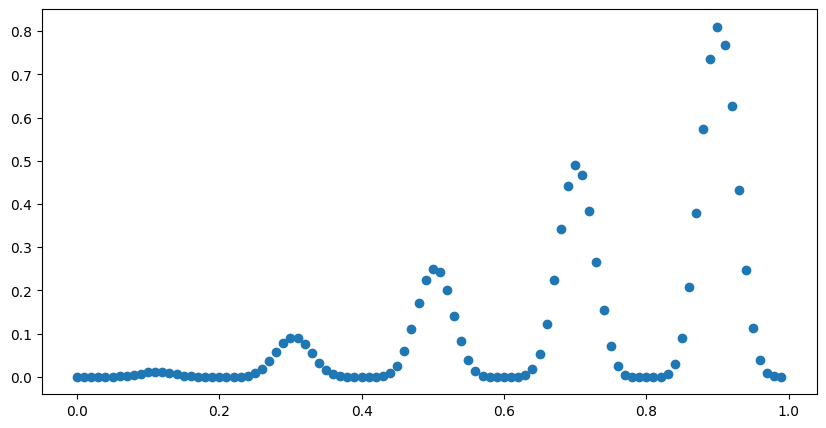

In [104]:
# sample the domain without noise
y = [objective(x, 0) for x in X]
plt.scatter(X, y)
plt.show()

We can then evaluate these same points with noise to see what the objective function will look like when we are optimizing it.

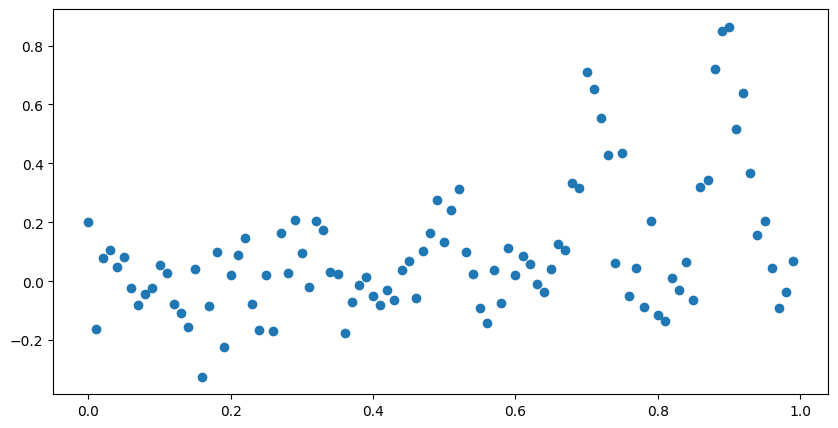

In [105]:
...
# sample the domain with noise
y_noise = [objective(x) for x in X]
plt.scatter(X, y_noise)
plt.show()

<b>We can look at all of the non-noisy objective function values to find the input that resulted in the best score and report it</b>. This will be the optima, in this case, maxima, as we are maximizing the output of the objective function.

<b>We would not know this in practice, but for out test problem, it is good to know the real best input and output of the function to see if the Bayesian Optimization algorithm can locate it</b>.

In [106]:
# find best result
ix = argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))

Optima: x=0.900, y=0.810


Finally, we can create a plot, first showing the noisy evaluation as a scatter plot with input on the x-axis and score on the y-axis, then a line plot of the scores without any noise.

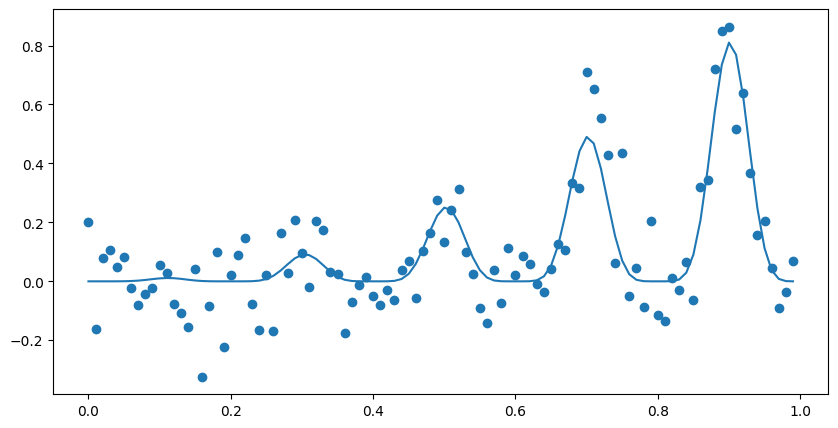

In [107]:
# plot the points with noise
plt.scatter(X, y_noise)

# plot the points without noise
plt.plot(X, y)

# show the plot
plt.show()

A plot is then created showing the noisy evaluation of the samples (dots) and the non-noisy and true shape of the objective function (line).

<b>Now that we have a test problem, let’s review how to train a surrogate function</b>.

### <a id='sect3_2'><b><font color='darkgreen'>Surrogate Function</font></b></a> ([back](#sect3))
<b><font size='3ptx'>The surrogate function is a technique used to best approximate the mapping of input examples to an output score.</font></b>

Probabilistically, it summarizes the conditional probability of an objective function (`f`), given the available data (`D`) or $P(f|D)$.

A number of techniques can be used for this, although <b>the most popular is to treat the problem as a regression predictive modeling problem with the data representing the input and the score representing the output to the model</b>. This is often best modeled using a [**Random forest**](https://en.wikipedia.org/wiki/Random_forest) or a [**Gaussian Process**](https://en.wikipedia.org/wiki/Gaussian_process).

**A [Gaussian Process](https://en.wikipedia.org/wiki/Gaussian_process), or GP, is a model that constructs a joint probability distribution over the variables, assuming a multivariate Gaussian distribution.** As such, it is capable of efficient and effective summarization of a large number of functions and smooth transition as more observations are made available to the model.

**This smooth structure and smooth transition to new functions based on data are desirable properties as we sample the domain, and the multivariate Gaussian basis to the model means that an estimate from the model will be a mean of a distribution with a standard deviation**; that will be helpful later in the acquisition function.

**As such, using a GP regression model is often preferred.**

We can fit a GP regression model using the [**GaussianProcessRegressor**](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html) scikit-learn implementation from a sample of inputs (`X`) and noisy evaluations from the objective function (`y`).

**First, the model must be defined. An important aspect in defining the GP model is the kernel. This controls the shape of the function at specific points based on distance measures between actual data observations**. Many different kernel functions can be used, and some may offer better performance for specific datasets.

By default, a [**Radial Basis Function**](https://en.wikipedia.org/wiki/Radial_basis_function), or RBF, is used that can work well.

In [108]:
# define the model
model = GaussianProcessRegressor()

Once defined, the model can be fit on the training dataset directly by calling the <font color='blue'>fit()</font> function.

The defined model can be fit again at any time with updated data concatenated to the existing data by another call to <font color='blue'>fit()</font>.

In [109]:
X_ary = np.array([x for x in X]).reshape(len(X), 1)
y_noise_ary = np.array([y for y in y_noise])

In [110]:
X_ary.shape

(100, 1)

In [111]:
%%time
# fit the model
model.fit(X_ary, y_noise_ary)

CPU times: user 32.4 ms, sys: 352 ms, total: 385 ms
Wall time: 21.4 ms


GaussianProcessRegressor()

**The model will estimate the cost for one or more samples provided to it.**

The model is used by calling the <font color='blue'>predict()</font> function. **The result for a given sample will be a mean of the distribution at that point**. We can also get the standard deviation of the distribution at that point in the function by specifying the argument `return_std=True`; for example:

In [112]:
yhat_mean_ary, yhat_std_ary = model.predict(X_ary[10:11], return_std=True)
print(f'X[10]={X_ary[10]} is predicted to have yhat_mean={yhat_mean_ary[0]:.01} with std={yhat_std_ary[0]:.02}')

X[10]=[0.1] is predicted to have yhat_mean=-0.04 with std=2.9e-06


This function can result in warnings if the distribution is thin at a given point we are interested in sampling.

Therefore, we can silence all of the warnings when making a prediction. The <font color='blue'>surrogate()</font> function below takes the fit model and one or more samples and returns the mean and standard deviation estimated costs while not printing any warnings.

In [113]:
# surrogate or approximation for the objective function
def surrogate(model, X_ary: np.array):
    """Returns the prediction of model from given `X_ary`."""
    # catch any warning generated when making a prediction
    with catch_warnings():
    	# ignore generated warnings
    	simplefilter("ignore")
    	return model.predict(X_ary, return_std=True)

We can call this function any time to estimate the cost of one or more samples, such as when we want to optimize the <b><font color='blue'>acquisition function</font></b> in the next section.

For now, it is interesting to see what the surrogate function looks like across the domain after it is trained on a random sample.

We can achieve this by first <b>fitting the GP model on a random sample of 100 data points and their real objective function values with noise. We can then plot a scatter plot of these points</b>. Next, we can perform a grid-based sample across the input domain and estimate the cost at each point using the surrogate function and plot the result as a line.

We would expect the surrogate function to have a crude approximation of the true non-noisy objective function. <b>The <font color='blue'>plot()</font> function below creates this plot, given the random data sample of the real noisy objective function and the fit model.</b>

In [114]:
# plot real observations vs surrogate function
def plot(X, y, model, title=None, selected_points=None):
    """Scatters the (`X`, `y`) pairs and then plot the prediction from model on `X`.""" 
    plt.rcParams['figure.figsize'] = [10, 5]
    
    # scatter plot of inputs and real objective function
    plt.scatter(X, y, label='Samples with noise')

    # scatter plot of selected points
    if selected_points:
        selected_X = [x for x, _ in selected_points]
        actual_y = [y for _, y in selected_points]
        plt.scatter(
            selected_X, actual_y,
            label='Selected points by optimization',
            color='lawngreen')
    
    # line plot of surrogate function across domain
    X_samples_ary = asarray(arange(0, 1, 0.001))
    X_samples_ary = X_samples_ary.reshape(len(X_samples_ary), 1)
    y_samples_ary, _ = surrogate(model, X_samples_ary)
    plt.plot(X_samples_ary, y_samples_ary, color='g', label='model prediction')

    # Plot the peak point vertex line
    max_y_pos = np.argmax(y_samples_ary)
    max_x_pos = X_samples_ary[max_y_pos][0]
    peak_value = y_samples_ary[max_y_pos]
    plt.axvline(
        x = max_x_pos, color='r',
        label=f'peak value: x={max_x_pos:.02f}; y={peak_value:.02f}')
    
    # show the plot
    if title:
        plt.title(title)
        
    plt.legend()
    plt.show()

Tying this together, <b>the complete example of fitting a Gaussian Process regression model on noisy samples and plotting the sample vs. the surrogate function is listed below</b>.

In [115]:
def run_gp(model=None, sample_count:int=100):
    # sample the domain sparsely with noise
    X_ary = random(sample_count)
    y_ary = asarray([objective(x) for x in X])
    # reshape into rows and cols
    X_ary = X_ary.reshape(len(X), 1)
    y_ary = y_ary.reshape(len(y), 1)
    # define the model
    if model is None:
        model = GaussianProcessRegressor()
        
    # fit the model
    model.fit(X_ary, y_ary)
    # plot the surrogate function
    plot(X_ary, y_ary, model)
    return model

Running the example first draws the random sample, evaluates it with the noisy objective function, then fits the GP model.

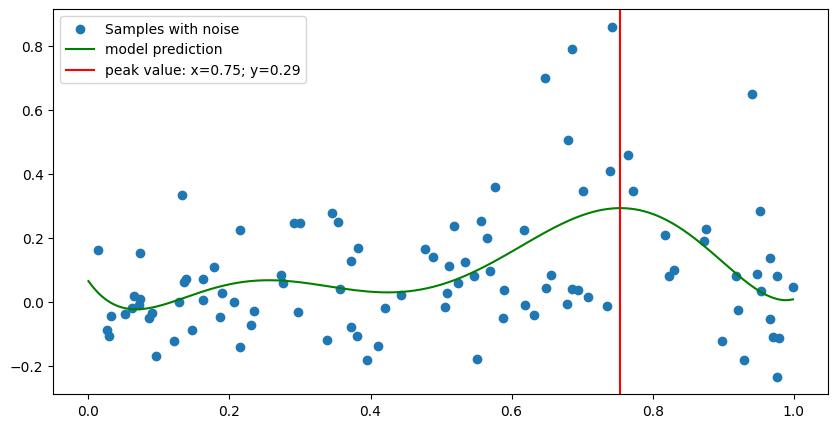

In [116]:
model = run_gp()

In this case, as we expected, the plot resembles a crude version of the underlying non-noisy objective function, importantly with <b>a peak as red line where we know the true maxima is located</b>.

<b>Next, we must define a strategy for sampling the surrogate function</b>.

### <a id='sect3_3'><font color='darkgreen'><b>Acquisition Function</b></font></a> ([back](#sect3))
<b><font size='3ptx'>The surrogate function is used to test a range of candidate samples in the domain.</font></b>

From these results, one or more candidates can be selected and evaluated with the real, and in normal practice, computationally expensive cost function.

<b>This involves two pieces: the search strategy used to navigate the domain in response to the surrogate function and the acquisition function that is used to interpret and score the response from the surrogate function</b>.

A simple search strategy, such as a random sample or grid-based sample, can be used, although it is more common to use a local search strategy, such as the popular [**BFGS algorithm**](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm):
> In numerical optimization, the <b>Broyden–Fletcher–Goldfarb–Shanno</b> (BFGS) algorithm is an [iterative method](https://en.wikipedia.org/wiki/Iterative_method) for solving unconstrained [nonlinear optimization](https://en.wikipedia.org/wiki/Nonlinear_optimization) problems.

<b>This involves first drawing a random sample of candidate samples from the domain, evaluating them with the acquisition function, then maximizing the acquisition function or choosing the candidate sample that gives the best score</b>. The <font color='blue'>opt_acquisition()</font> function below implements this.

In [117]:
# optimize the acquisition function
def opt_acquisition(X_ary, y_ary, model):
    """Selects the sample for next round of optimization iteration."""
    # random search, generate random samples
    X_samples_ary = random(100)
    X_samples_ary = X_samples_ary.reshape(len(X_samples_ary), 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X_ary, X_samples_ary, model)
    # locate the index of the largest scores
    ix = argmax(scores)
    return X_samples_ary[ix, 0]

<b>The acquisition function is responsible for scoring or estimating the likelihood that a given candidate sample</b> (input) <b>is worth evaluating with the real objective function</b>.

We could just use the surrogate score directly. Alternately, given that we have chosen a Gaussian Process model as the surrogate function, we can <b>use the probabilistic information from this model in the acquisition function to calculate the probability that a given sample is worth evaluating</b>.

There are many different types of probabilistic acquisition functions that can be used, each providing a different trade-off for how exploitative (greedy) and explorative they are. Three common examples include:

* [**Probability of Improvement**](https://optimization.cbe.cornell.edu/index.php?title=Bayesian_Optimization#Probability_of_Improvement) (PI).
* Expected Improvement (EI).
* Lower Confidence Bound (LCB).

The <font color='darkblue'><b>Probability of Improvement</b></font> method is the simplest, whereas the <font color='darkblue'><b>Expected Improvement</b></font> method is the most commonly used.only used.d (LCB).CB).

In this case, <b>we will use the simpler Probability of Improvement method, which is calculated as the normal cumulative probability of the normalized expected improvement</b>, calculated as follows:
> $PI = cdf((mu – best_mu) / stdev)$

Where `PI` is the probability of improvement, `cdf()` is the normal cumulative distribution function, `mu` is the mean of the surrogate function for a given sample `x`, `stdev` is the standard deviation of the surrogate function for a given sample `x`, and `best_mu` is the mean of the surrogate function for the best sample found so far. We can add a very small number to the standard deviation to avoid a divide by zero error.

The <font color='blue'>acquisition()</font> function below implements this given the current training dataset of input samples, an array of new candidate samples, and the fit GP model.

In [118]:
# probability of improvement acquisition function
def acquisition(X_ary, X_samples_ary, model):
    # calculate the best surrogate score found so far
    yhat_ary, _ = surrogate(model, X_ary)
    best = max(yhat_ary)
    # calculate mean and stdev via surrogate function
    mu, std = surrogate(model, X_samples_ary)
    # print(f'Test: mu={mu}')
    # mu = mu[:, 0]
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs

### <a id='sect3_4'><b><font color='darkgreen'>Complete Bayesian Optimization Algorithm</font></b></a> ([back](#sect3))
<b><font size='3ptx'>We can tie all of this together into the Bayesian Optimization algorithm.</font></b>

The main algorithm involves cycles of selecting candidate samples, evaluating them with the objective function, then updating the GP model:
```python
...
# perform the optimization process
for i in range(100):
	# select the next point to sample
	x = opt_acquisition(X, y, model)
	# sample the point
	actual = objective(x)
	# summarize the finding for our own reporting
	est, _ = surrogate(model, [[x]])
	print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
	# add the data to the dataset
	X = vstack((X, [[x]]))
	y = vstack((y, [[actual]]))
	# update the model
	model.fit(X, y)
```

The complete example is listed below:

In [119]:
def run_bayesian_optimization(iter_round: int=100):
    # sample the domain sparsely with noise
    X_ary = random(100)
    y_ary = asarray([objective(x) for x in X_ary])
    # reshape into rows and cols
    X_ary = X_ary.reshape(len(X_ary), 1)
    y_ary = y_ary.reshape(len(y_ary), 1)

    # define the model
    model = GaussianProcessRegressor()

    # fit the model
    model.fit(X_ary, y_ary)
    
    # plot before hand
    plot(X_ary, y_ary, model, title='Initial')

    # perform the optimization process
    selected_points = []
    for i in range(iter_round):
        # select the next point to sample
        x = opt_acquisition(X_ary, y_ary, model)
        # sample the point
        actual = objective(x)
        selected_points.append((x, actual))
        # summarize the finding
        est, _ = surrogate(model, [[x]])

        if i % 10 == 0:
            print('> x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
        # add the data to the dataset
        X_ary = vstack((X_ary, [[x]]))
        y_ary = vstack((y_ary, [[actual]]))
        # update the model
        model.fit(X_ary, y_ary)
 
    # best result
    ix = argmax(y_ary)
    print('Best Result: x=%.3f, y=%.3f' % (X_ary[ix], y_ary[ix]))
    # plot all samples and the final surrogate function
    plot(X_ary, y_ary, model, 'final', selected_points=selected_points)

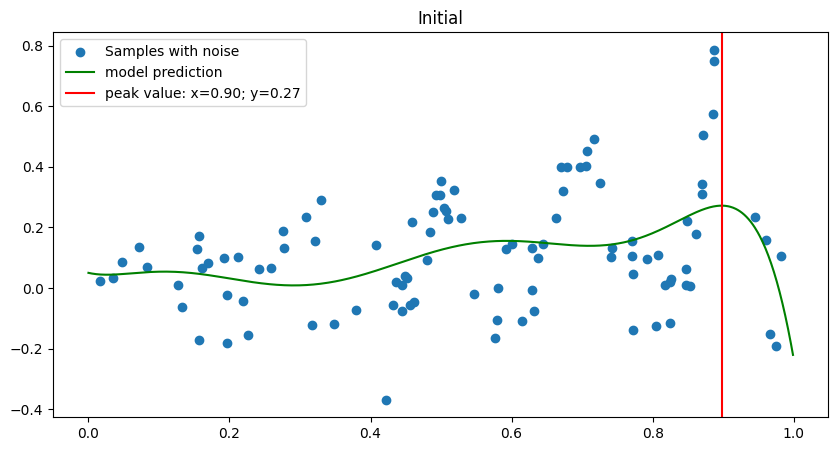

> x=0.908, f()=0.269405, actual=0.747
> x=0.907, f()=0.458229, actual=0.883
> x=0.663, f()=0.089732, actual=0.085
> x=0.056, f()=0.027028, actual=-0.101
> x=0.957, f()=0.283115, actual=0.176
> x=0.202, f()=0.029233, actual=-0.102
> x=0.253, f()=0.005074, actual=-0.150
> x=0.363, f()=0.016976, actual=-0.053
> x=0.275, f()=-0.011595, actual=0.001
> x=0.079, f()=-0.003922, actual=0.071
Best Result: x=0.908, y=0.962


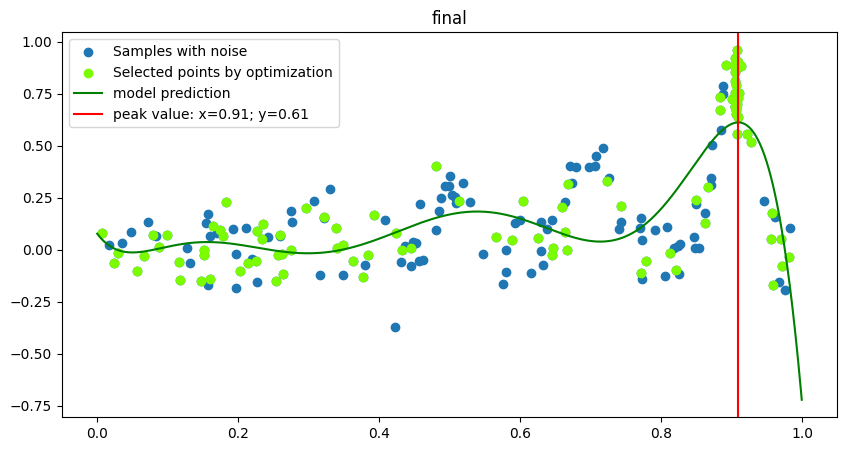

In [120]:
run_bayesian_optimization()

The algorithm then iterates for 100 cycles, selecting samples, evaluating them, and adding them to the dataset to update the surrogate function, and over again.

Each cycle reports the selected input value, the estimated score from the surrogate function, and the actual score. Ideally, these scores would get closer and closer as the algorithm converges on one area of the search space.

Next, a final plot is created with the same form as the prior plot.

### <a id='sect3_5'><b><font color='darkgreen'>Hyperparameter Tuning With Bayesian Optimization</font></b></b> ([back](#sect3))
<b><font size='3ptx'>It can be a useful exercise to implement Bayesian Optimization to learn how it works.</font></b>

<b>In practice, when using Bayesian Optimization on a project, it is a good idea to use a standard implementation provided in an open-source library</b>. This is to both avoid bugs and to leverage a wider range of configuration options and speed improvements.

Two popular libraries for Bayesian Optimization include [**Scikit-Optimize**](https://github.com/scikit-optimize/scikit-optimize) and [**HyperOpt**](https://github.com/hyperopt/hyperopt). In machine learning, these libraries are often used to tune the hyperparameters of algorithms.

Hyperparameter tuning is a good fit for Bayesian Optimization because the evaluation function is computationally expensive (<font color='brown'>e.g. training models for each set of hyperparameters</font>) and noisy (<font color='brown'>e.g. noise in training data and stochastic learning algorithms</font>).

**In this section, we will take a brief look at how to use the [Scikit-Optimize](https://github.com/scikit-optimize/scikit-optimize) library to optimize the hyperparameters of a k-nearest neighbor classifier for a simple test classification problem**. This will provide a useful template that you can use on your own projects.

The [**Scikit-Optimize**](https://github.com/scikit-optimize/scikit-optimize) project is designed to provide access to Bayesian Optimization for applications that use SciPy and NumPy, or applications that use scikit-learn machine learning algorithms.

First, the library must be installed, which can be achieved easily using pip; for example:
```shell
$ sudo pip install scikit-optimize
```

It is also assumed that you have [**scikit-learn**](https://scikit-learn.org/stable/index.html) installed for this example.

Once installed, there are two ways that scikit-optimize can be used to optimize the hyperparameters of a scikit-learn algorithm. The first is to perform the optimization directly on a search space, and the second is to use the [**BayesSearchCV**](https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html) class, a sibling of the scikit-learn native classes for random and grid searching.

In this example, will use the simpler approach of optimizing the hyperparameters directly.

The first step is to prepare the data and define the model. We will use a simple test classification problem via the [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function with 500 examples, each with two features and three class labels. We will then use a [**KNeighborsClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm.

In [121]:
# example of bayesian optimization with scikit-optimize
from numpy import mean
import matplotlib
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

In [122]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=1.5)

In [123]:
print(f'X.shape={X.shape}; y.shape={y.shape}')

X.shape=(500, 2); y.shape=(500,)


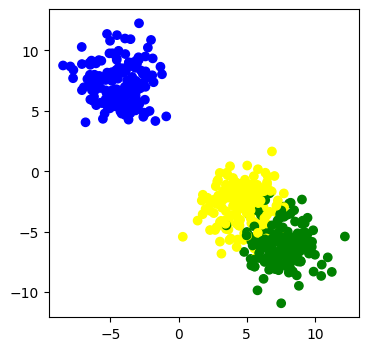

In [124]:
colors = ['yellow', 'green', 'blue', 'blue']

fig = plt.figure(figsize=(4, 4))
plt.scatter(
    X[:, 0], X[:, 1], c=[colors[pos] for pos in y])

In [125]:
# define the model
model = KNeighborsClassifier()

**Next, we must define the search space.**

In this case, we will tune the number of neighbors (<font color='violet'>n_neighbors</font>) and the shape of the neighborhood function (<font color='violet'>p</font>). This requires ranges be defined for a given data type. In this case, they are Integers, defined with the min, max, and the name of the parameter to the scikit-learn model. For your algorithm, you can just as easily optimize `Real()` and `Categorical()` data types.
* **`n_neighborsint`:int, default=5**: Number of neighbors to use by default for [kneighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors) queries.
* **`p`:float, default=2**: When `p = 1`, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for `p = 2`. 

In [126]:
# define the space of hyperparameters to search
search_space = [
    Integer(1, 5, name='n_neighbors'),
    Integer(1, 2, name='p')]

<b>Next, we need to define a function that will be used to evaluate a given set of hyperparameters</b>. We want to minimize this function, therefore smaller values returned must indicate a better performing model.

We can use the `use_named_args()` decorator from the scikit-optimize project on the function definition that <b>allows the function to be called directly with a specific set of parameters from the search space</b>.

As such, **our custom function will take the hyperparameter values as arguments**, which can be provided to the model directly in order to configure it. We can define these arguments generically in python using the `params` argument to the function, then pass them to the model via the [`set_params()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.set_params) function.

Now that the model is configured, we can evaluate it. In this case, we will **use 5-fold cross-validation on our dataset and evaluate the accuracy for each fold**. We can then **report the performance of the model as one minus the mean accuracy across these folds**. This means that a perfect model with an accuracy of 1.0 will return a value of 0.0 (<font color='brown'>1.0 – mean accuracy</font>).

This function is defined after we have loaded the dataset and defined the model so that both the dataset and model are in scope and can be used directly.

In [127]:
# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
    # something
    model.set_params(**params)
    # calculate 5-fold cross validation
    result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = mean(result)
    return 1.0 - estimate

<b>Next, we can perform the optimization.</b>

This is achieved by calling the [`gp_minimize()`](https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html) function with the name of the objective function and the defined search space.

By default, this function will use a `gp_hedge` acquisition function that tries to figure out the best strategy, but this can be configured via the <font color='violet'>acq_func</font> argument. The optimization will also run for 100 iterations by default, but this can be controlled via the <font color='violet'>n_calls</font> argument.

In [128]:
%%time
# perform optimization
with catch_warnings():
    # ignore generated warnings
    simplefilter("ignore")
    result = gp_minimize(evaluate_model, search_space)

CPU times: user 2min 18s, sys: 14min 40s, total: 16min 58s
Wall time: 48.9 s


Once run, we can access the best score via the "fun" property and the best set of hyperparameters via the "x" array property.

In [129]:
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

Best Accuracy: 0.952
Best Parameters: n_neighbors=4, p=2


Running the example executes the hyperparameter tuning using Bayesian Optimization. With those optimized hyperparameter, we could retrain the model and check the result of our model on graph:

In [130]:
model = KNeighborsClassifier(n_neighbors=result.x[0], p=result.x[1])
model.fit(X, y)

KNeighborsClassifier(n_neighbors=4)

In [131]:
y_pred = model.predict(X)

In [132]:
y_pred[:20]

array([2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0])

In [133]:
y[:20]

array([2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0])

In [134]:
y_refine = [y1 if y1==y2 else 3 for y1, y2 in zip(y_pred, y)]
y_refine[:20]

[2, 2, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 1, 0, 0, 0, 3, 1, 2, 0]

Text(0.5, 1.0, 'Predicted class distribution')

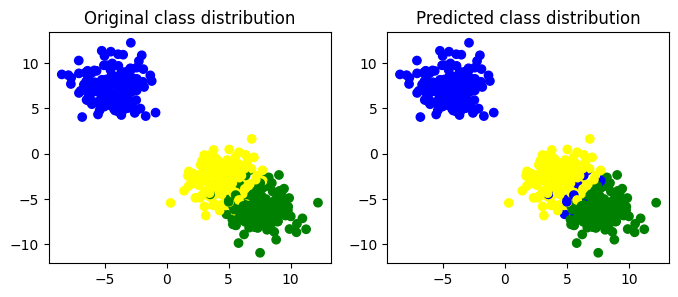

In [135]:
figure, axis = plt.subplots(1, 2, figsize=(8, 3)) 

axis[0].scatter(X[:, 0], X[:, 1], c=[colors[pos] for pos in y]) 
axis[0].set_title("Original class distribution") 

axis[1].scatter(X[:, 0], X[:, 1], c=[colors[pos] for pos in y_refine]) 
axis[1].set_title("Predicted class distribution") 

## <b><font color='darkblue'>Further Reading</font></b>
This section provides more resources on the topic if you are looking to go deeper.

### <b><font color='darkgreen'>Papers</font></b>
* [A Tutorial on Bayesian Optimization of Expensive Cost Functions, with Application to Active User Modeling and Hierarchical Reinforcement Learning](https://arxiv.org/abs/1012.2599), 2010.
* [Practical Bayesian Optimization of Machine Learning Algorithms](http://papers.nips.cc/paper/4522-practical-bayesian-optimization), 2012.
* [A Tutorial on Bayesian Optimization](https://arxiv.org/abs/1807.02811), 2018.8.

### <b><font color='darkgreen'>Others</font></b>
* [Gaussian Processes, Scikit-Learn API.](https://scikit-learn.org/stable/modules/gaussian_process.html)
* [Hyperopt: Distributed Asynchronous Hyper-parameter Optimization](https://github.com/hyperopt/hyperopt)
* [Scikit-Optimize Project.](https://github.com/scikit-optimize/scikit-optimize)
* [Tuning a scikit-learn estimator with skopt](https://github.com/scikit-optimize/scikit-optimize/blob/master/examples/hyperparameter-optimization.ipynb)opt

## <b><font color='darkblue'>Supplement</font></b>
* [mlmastery - Hyperparameter Optimization With Random Search and Grid Search](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)
* [台部落 - 貝葉斯優化(BayesianOptimization)](https://www.twblogs.net/a/5c4ab8b0bd9eee6e7e069cd4)
* [Jupyter - Math and equations](https://jupyterbook.org/en/stable/content/math.html)